# Linear regression

In [1]:
import numpy as np
import uproot as ur
import matplotlib.pyplot as plt
import pandas as pd
import copy
import sys

from scipy import stats

In [2]:
sys.path.append('../')

from src.load_data import train_val_test_split

In [3]:
data_df = pd.read_csv("../data/polar_dataset.csv")

In [4]:
data_df

,saa,raz,decz,rax,decx,obox_mode,sum_fe_temp,glon,glat,tunix,sum_fe_cosmic,sum_fe_rate,B_r,B_theta,B_phi
0,0.0,347.349127,-0.937748,80.620806,-73.996722,4.0,0.000000,126.09445,9.49647,1.479466e+09,4.0,5.0,-2751.871739,-32568.992278,-445.591802
1,0.0,347.454256,-1.023284,81.014459,-73.952718,4.0,125.000000,126.18450,9.40926,1.479466e+09,0.0,0.0,-2634.693985,-32565.342209,-434.138091
2,0.0,347.559538,-1.108477,81.405345,-73.908071,4.0,127.083336,126.27455,9.32193,1.479466e+09,0.0,0.0,-2517.481310,-32561.795217,-422.610325
3,0.0,347.664456,-1.192763,81.790901,-73.862459,4.0,130.208340,126.36455,9.23460,1.479466e+09,0.0,0.0,-2400.351546,-32558.011667,-411.009522
4,0.0,347.769287,-1.277690,82.176902,-73.816395,4.0,131.250000,126.45445,9.14730,1.479466e+09,0.0,0.0,-2283.352731,-32554.038396,-399.342470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262970,0.0,274.174833,-4.945285,260.499167,84.911170,4.0,0.000000,43.83530,-15.99588,1.491273e+09,0.0,0.0,20797.564440,-18662.786449,-3486.045002
5262971,0.0,274.276958,-5.029454,260.767636,84.828197,4.0,0.000000,43.93020,-16.08015,1.491273e+09,0.0,0.0,20848.026922,-18635.681413,-3515.989772
5262972,0.0,274.379394,-5.113467,261.032234,84.745364,4.0,0.000000,44.02525,-16.16439,1.491273e+09,0.0,0.0,20898.528499,-18608.662998,-3545.976294
5262973,0.0,274.481898,-5.197639,261.290657,84.662301,4.0,0.000000,44.12035,-16.24857,1.491273e+09,0.0,0.0,20949.138349,-18581.787518,-3575.998276


In [5]:
corr = data_df.corr()

In [6]:
corr

,saa,raz,decz,rax,decx,obox_mode,sum_fe_temp,glon,glat,tunix,sum_fe_cosmic,sum_fe_rate,B_r,B_theta,B_phi
saa,1.000000,0.008131,0.019461,-0.146167,-0.128785,-0.142659,-0.184700,0.002887,0.047496,-0.076861,0.058351,0.041201,-0.005760,-0.057570,0.042619
raz,0.008131,1.000000,0.083527,-0.114804,0.190301,-0.006030,-0.164876,-0.017019,0.026996,-0.029898,-0.012645,0.006483,-0.026997,-0.019561,-0.001825
decz,0.019461,0.083527,1.000000,-0.096701,0.083359,-0.337315,-0.005575,-0.006812,0.952733,-0.016209,-0.025139,-0.006533,-0.906323,-0.425191,-0.006280
rax,-0.146167,-0.114804,-0.096701,1.000000,0.195639,0.030754,0.172211,0.001744,-0.138125,-0.229382,0.054844,0.050510,0.132297,0.067000,0.010851
decx,-0.128785,0.190301,0.083359,0.195639,1.000000,0.059696,0.036561,-0.006216,-0.161624,-0.010165,0.043913,0.054292,0.150984,0.095078,0.000073
obox_mode,-0.142659,-0.006030,-0.337315,0.030754,0.059696,1.000000,-0.020455,-0.108804,-0.354177,0.004112,-0.381835,-0.414227,0.189356,0.468773,-0.271070
sum_fe_temp,-0.184700,-0.164876,-0.005575,0.172211,0.036561,-0.020455,1.000000,0.001774,-0.024944,0.095260,0.127505,0.112883,0.026669,0.005235,0.011424
glon,0.002887,-0.017019,-0.006812,0.001744,-0.006216,-0.108804,0.001774,1.000000,-0.002236,-0.000338,0.088133,0.079806,0.156317,-0.198840,-0.296584
glat,0.047496,0.026996,0.952733,-0.138125,-0.161624,-0.354177,-0.024944,-0.002236,1.000000,-0.000559,-0.048113,-0.032696,-0.948355,-0.463218,-0.004082
tunix,-0.076861,-0.029898,-0.016209,-0.229382,-0.010165,0.004112,0.095260,-0.000338,-0.000559,1.000000,-0.058350,-0.073236,0.000730,-0.002749,0.004364


In [7]:
corr["sum_fe_rate"]

saa              0.041201
raz              0.006483
decz            -0.006533
rax              0.050510
decx             0.054292
obox_mode       -0.414227
sum_fe_temp      0.112883
glon             0.079806
glat            -0.032696
tunix           -0.073236
sum_fe_cosmic    0.926909
sum_fe_rate      1.000000
B_r              0.087670
B_theta          0.278132
B_phi           -0.039451
Name: sum_fe_rate, dtype: float64

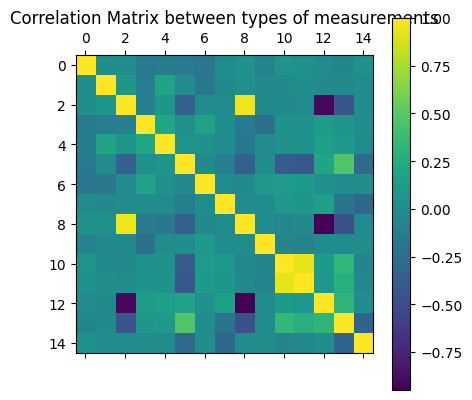

In [8]:
plt.matshow(corr)
plt.colorbar()

plt.title('Correlation Matrix between types of measurements')
plt.show()

We can observe, a high Pearson linear correlation between `sum_fe_rate` and `sum_fe_cosmic` as Nicolas Produit has previously shown me during his explanations using ROOT CERN tool.

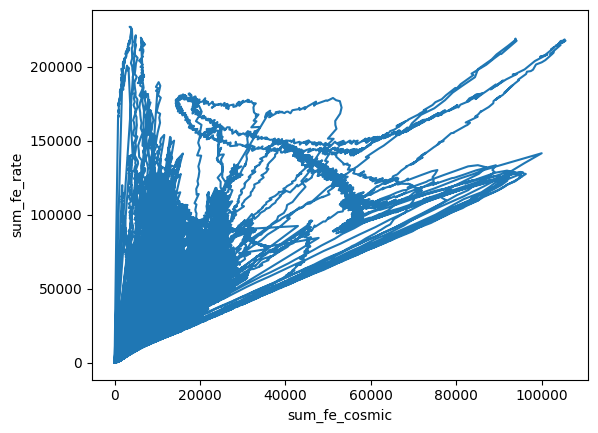

In [9]:
# We don't scatter plot so that we can also see the temporal connection
plt.plot(data_df["sum_fe_cosmic"], data_df["sum_fe_rate"])
plt.xlabel("sum_fe_cosmic")
plt.ylabel("sum_fe_rate")
plt.show()

However, it's not sufficient to pass a line through it !! However we'll still do it just to observe the predicted light curve

## Linear regression only using `sum_fe_cosmic`

We'll use as target variable `sum_fe_rate`, not its reconstructed version from FFT. Moreover, a linear regression has a gaussian noise assumption as well as i.i.d examples.. which is very restrictive

Let's split the dataset

In [10]:
X = data_df.drop(columns=["sum_fe_rate"])
y = data_df["sum_fe_rate"]
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y,
                                                                      val_size=0.2,
                                                                      test_size=0.2,
                                                                      random_state=42,
                                                                      shuffle=True)

In [11]:
result = stats.linregress(X_train["sum_fe_cosmic"], y_train)

print(f"Slope a: {result.slope}, Intercept b: {result.intercept},\nR^2: {result.rvalue**2}, p-value: {result.pvalue}")
print("\n"+f"std_a: {result.stderr}, std_b: {result.intercept_stderr}")

Slope a: 2.0755229303461404, Intercept b: 1914.116496688599,
R^2: 0.8601650289310484, p-value: 0.0

std_a: 0.0004709267953876174, std_b: 3.4611224383729415


This means that there's around $ 85.9 \%$ less variation around the regression line than the average `sum_fe_rate`, which is great and our p-value (which is less than 0.05) tells us that it's statistically significant to reject the null hypothesis stating that the slope is 0. Therefore, our R-squared is statistically significant meaning that it might be useful using the linear relation between `sum_fe_rate` and `sum_fe_cosmic`.

In [12]:
y_train_hat = X_train["sum_fe_cosmic"].values*result.slope + result.intercept

In [13]:
y_train, y_train_hat

(0           9278.0
 1           8913.0
 2              0.0
 3              0.0
 4          32506.0
             ...   
 3157780     8782.0
 3157781    29568.0
 3157782    11138.0
 3157783     8795.0
 3157784    12900.0
 Name: sum_fe_rate, Length: 3157785, dtype: float64,
 array([ 8555.7898738 ,  7904.07567367,  1914.11649669, ...,
         9539.58774278,  8005.77629725, 12897.78384408]))

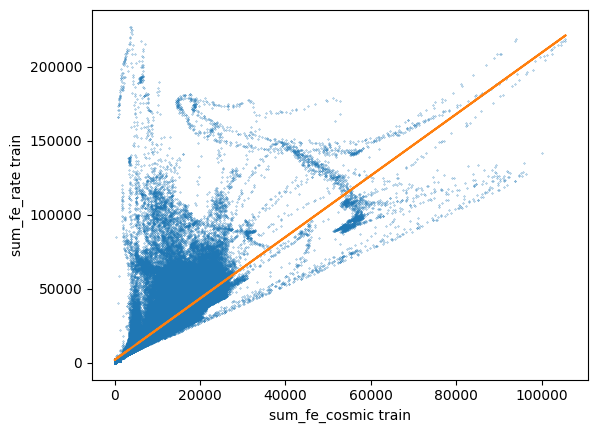

In [14]:
import matplotlib as mpl

plt.plot(X_train["sum_fe_cosmic"], y_train, '.', markersize=0.5)
plt.plot(X_train["sum_fe_cosmic"], y_train_hat)
plt.xlabel("sum_fe_cosmic train")
plt.ylabel("sum_fe_rate train")
plt.show()

In [15]:
argsort = np.argsort(X_val["tunix"])[::-1]
sorted_time_val = X_val["tunix"][argsort]
sorted_y_val_r0 = (y_val.values)[argsort]
sorted_val_r0 = y_train_hat[argsort]

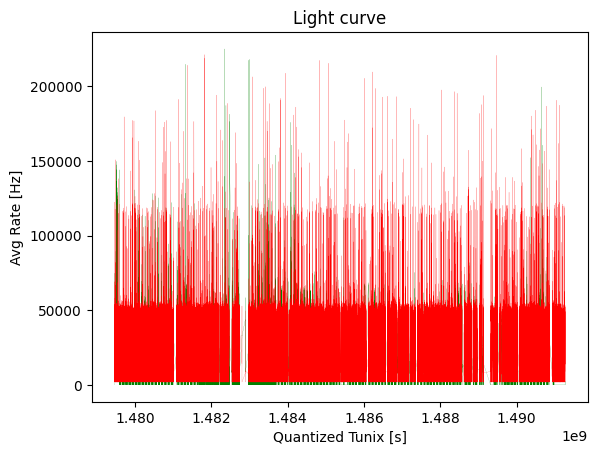

In [16]:
plt.plot(sorted_time_val, sorted_y_val_r0, 'g', linewidth=0.1)
plt.plot(sorted_time_val, sorted_val_r0, 'r', linewidth=0.1)
plt.xlabel("Quantized Tunix [s]")
plt.ylabel("Avg Rate [Hz]")  # Nb. photons per second (averaged over each bin)
plt.title("Light curve")
plt.show()

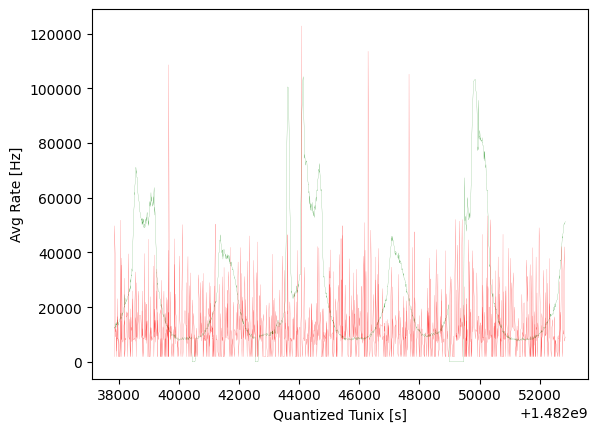

In [17]:
# Mask used to select a portion of the mission
t = sorted_time_val
mask = (t>(5000+1482032854)) & (t<(20000+1482032854))

plt.plot(t[mask], sorted_y_val_r0[mask], '-g', linewidth=0.1)
plt.plot(t[mask], sorted_val_r0[mask], 'r', linewidth=0.1)
plt.xlabel("Quantized Tunix [s]")
plt.ylabel("Avg Rate [Hz]")  # nb. photons per seconds (averaged over each bin)
plt.show()

Over a bigger range

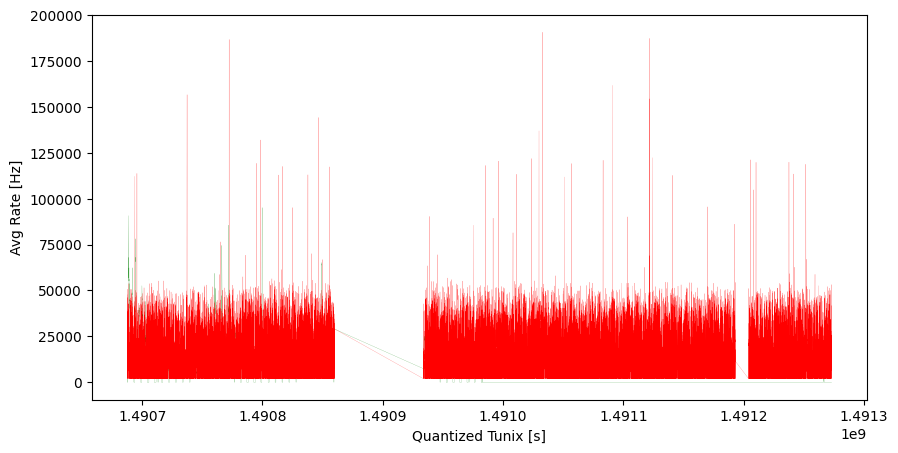

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(t[:50000], sorted_y_val_r0[:50000], '-g', linewidth=0.1)
plt.plot(t[:50000], sorted_val_r0[:50000], 'r', linewidth=0.1)
plt.xlabel("Quantized Tunix [s]")
plt.ylabel("Avg Rate [Hz]")  # nb. photons per seconds (averaged over each bin)
plt.show()

- Residual plot:

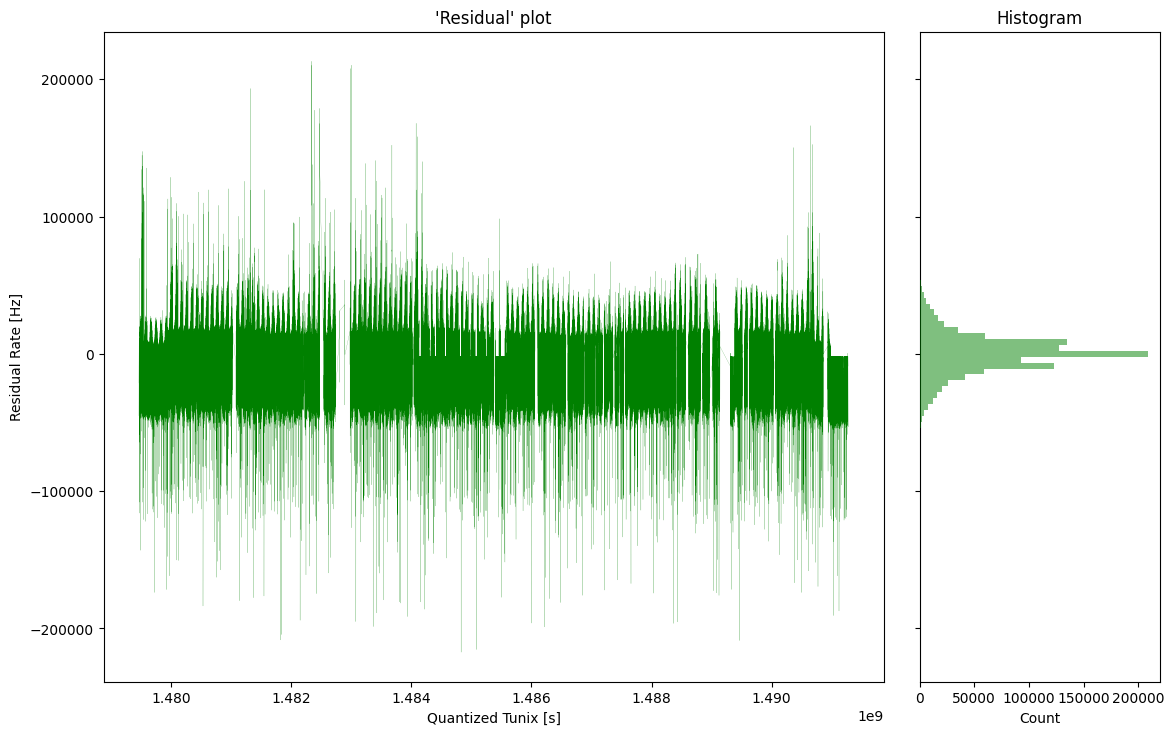

In [20]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.03
rect_residuals = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes(rect_residuals)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.plot(t, sorted_y_val_r0-sorted_val_r0, 'g', linewidth=0.1)
ax.set_xlabel("Quantized Tunix [s]")
ax.set_ylabel("Residual Rate [Hz]")
ax.set_title("'Residual' plot")

ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.set_title("Histogram")
ax_histy.set_xlabel("Count")


_ = ax_histy.hist(sorted_y_val_r0-sorted_val_r0, bins=100, orientation='horizontal',
color='g', alpha=0.5, zorder=np.inf)


plt.show()

Which doesn't look gaussian